In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
bs = 32

In [ ]:
trainset = datasets.MNIST(root = "/", download = True, train = True, transform = transforms.ToTensor())
testset = datasets.MNIST (root = "/", download = True, train = False, transform = transforms.ToTensor())

train_loader = DataLoader(trainset, batch_size = bs)
test_loader = DataLoader(testset, batch_size = bs )

In [ ]:
batch = next(iter(train_loader))

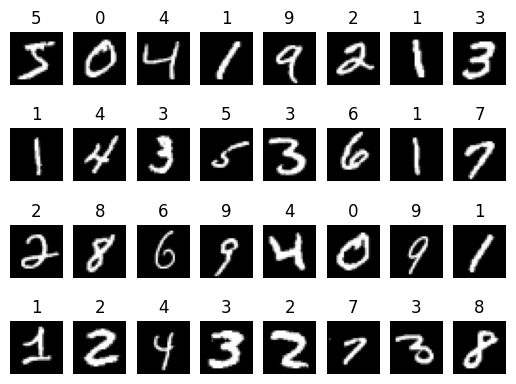

In [ ]:
for i in range(bs):
  plt.subplot(4,8, i+1)
  plt.imshow(batch[0][i,0,:,:], cmap = "gray")
  plt.title(batch[1][i].item())
  plt.axis("off")


In [ ]:
batch[0].shape

torch.Size([32, 1, 28, 28])

In [ ]:
class SimpleNN(nn.Module):
  def __init__(self, ni, nh, no):
    super().__init__()
    self.layer1 = nn.Linear(ni, nh)
    self.layer2 = nn.Linear(nh, no)

  def forward(self, x):
    x = self.layer1(x)
    x = torch.sigmoid(x)
    x = self.layer2(x)
    #softmax
    return x



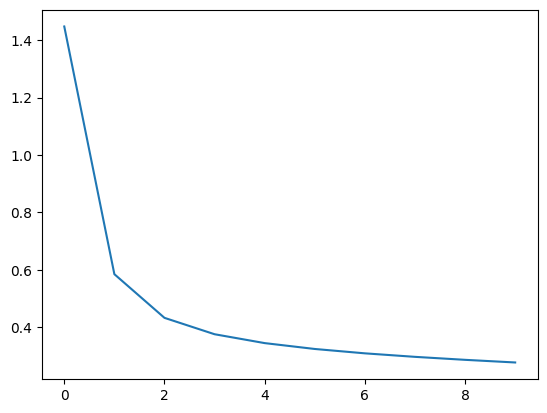

In [ ]:
device = torch.device("cuda")
ni = 28*28
nh = 100
no = 10
num_epochs = 10

net = SimpleNN(ni, nh, no).to(device)
opt = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.5)
ls = []
for i in range(num_epochs):
  total_loss = 0
  for batch in train_loader:
    X = batch[0].to(device).view(-1, 1*28*28)
    labels = batch[1].to(device)
    #forward
    yhat = net(X)
    #loss calculation
    loss = F.cross_entropy(yhat, labels)
    total_loss += loss.item()
    #backward pass
    opt.zero_grad()
    loss.backward()
    #optimization
    opt.step()

  ls.append(total_loss/len(train_loader))


plt.plot(ls)




In [ ]:
10,000%32


(10, 0)